In [2]:
import urllib
# dartNumber = 21414
from bs4 import BeautifulSoup
# url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
#         "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
#         "endday=26&submit=Submit")
# sock = urllib.request.urlopen(url).read().decode("utf-8")

# soup = BeautifulSoup(sock, 'html.parser')

In [3]:
def getCoordinatesFromSoup(soup):
    #Find the "meta" with all coordinates

    for meta in soup.find_all('meta'):
        if 'name' in meta.attrs and meta.attrs['name'] =='description':break

    # Parse its content

    s = meta.attrs['content']
    n,e = s[s.find("(")+1:s.find(")")].split()
    n = float(n[:-1]) if n[-1] == 'N' else -float(n[:-1])
    e = float(e[:-1]) if e[-1] == 'E' else -float(e[:-1])
    return e,n

In [4]:
import os

In [5]:
def readAndWriteDARTBuoy(dartNumber):
    """
        Parses the online website info for the dart buoy,
        saves the time series to a file and returns its soup for further operations
    """
    import urllib
    from bs4 import BeautifulSoup
    url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
            "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
            "endday=26&submit=Submit")
    sock = urllib.request.urlopen(url).read().decode("utf-8")

    soup = BeautifulSoup(sock, 'html.parser')
    fileName = 'dart{}'.format(dartNumber)
        
    f = open(fileName,'w')
    f.write(soup.textarea.contents[0])
    f.close()
    
    print(os.popen('head '+fileName).read())
    
    return soup

In [6]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]

In [7]:
coordinates = {}

In [10]:
for dartNumber in DARTs:
    print(dartNumber)
    soup = readAndWriteDARTBuoy(dartNumber)
    coordinates[dartNumber]  = getCoordinatesFromSoup(soup)

21414

21419

21401

21418

21413

52403

52406

55012

51425

51407

46404

46407

46411

46412

43412

43413

32411

32412

32413

32401



In [11]:
for k in coordinates.keys():
    print('{}: {{location:[{},{}]}},'.format("'"+str(k)+"'",coordinates[k][0]%360,coordinates[k][1]))

'21414': {location:[178.219,48.968]},
'21419': {location:[155.717,44.435]},
'21401': {location:[152.583,42.617]},
'21418': {location:[148.645,38.727]},
'21413': {location:[152.132,30.533]},
'52403': {location:[145.52,4.02]},
'52406': {location:[164.977,-5.307]},
'55012': {location:[158.453,-15.664]},
'51425': {location:[183.68,-9.517]},
'51407': {location:[203.455,19.57]},
'46404': {location:[231.225,45.848]},
'46407': {location:[231.175,42.708]},
'46411': {location:[232.933,39.333]},
'46412': {location:[239.418,32.4]},
'43412': {location:[253.03300000000002,16.045]},
'43413': {location:[259.91700000000003,11.012]},
'32411': {location:[269.12,4.953]},
'32412': {location:[273.626,-17.984]},
'32413': {location:[266.483,-7.409]},
'32401': {location:[286.579,-20.474]},


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

21414
21419
21401
21418
21413
52403
52406
55012
51425
51407
46404
46407
46411
46412
43412
43413
32411
32412
32413
32401


[]

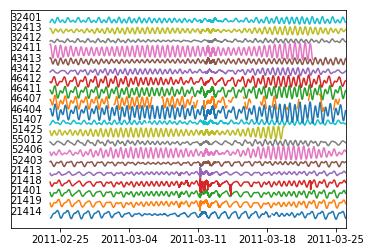

In [13]:
for i,dartNumber in enumerate(DARTs):
    print(dartNumber)
    params = {
        'filepath_or_buffer': 'dart{}'.format(dartNumber),
        'skiprows': 2,
        'delim_whitespace': True,
        'names' : 'year month day hour minute second T height'.split(),
        'na_values': 9999
    }
    df = pd.read_csv(**params)
    df['date'] = pd.to_datetime(df['year month day hour minute second'.split()])
    df = df['date height'.split()]

    plt.plot(df['date'],df['height']-df['height'].mean()+i*1.5)
    plt.text(df['date'].min()-pd.Timedelta(days=4),i*1.5,'{}'.format(dartNumber))
plt.ylim(-2,30)
plt.xlim(df['date'].min()-pd.Timedelta(days=4), df['date'].max())
plt.gca().set_yticks([])

# Plot on map

In [14]:
z = np.fromfile('bathymetry')

z[0],z[1]
z = np.reshape(z[2:],(int(z[0]),int(z[1])))

In [29]:
ncols,nrows = z.shape
xll = 90
yll = -70
cell = 1/60*5
xur = xll + (nrows-1)*cell
yur = yll + (ncols-1)*cell

In [30]:
x = np.linspace(xll,xur,nrows)
y = np.linspace(yll,yur,ncols)

In [31]:
coordinates

{21414: (178.219, 48.968),
 21419: (155.717, 44.435),
 21401: (152.583, 42.617),
 21418: (148.645, 38.727),
 21413: (152.132, 30.533),
 52403: (145.52, 4.02),
 52406: (164.977, -5.307),
 55012: (158.453, -15.664),
 51425: (-176.32, -9.517),
 51407: (-156.545, 19.57),
 46404: (-128.775, 45.848),
 46407: (-128.825, 42.708),
 46411: (-127.067, 39.333),
 46412: (-120.582, 32.4),
 43412: (-106.967, 16.045),
 43413: (-100.083, 11.012),
 32411: (-90.88, 4.953),
 32412: (-86.374, -17.984),
 32413: (-93.517, -7.409),
 32401: (-73.421, -20.474)}

In [32]:
60/1801*60

1.9988895058300944

In [33]:
x,y

(array([ 90.        ,  90.08333333,  90.16666667, ..., 289.75      ,
        289.83333333, 289.91666667]),
 array([-70.        , -69.91666667, -69.83333333, ...,  69.75      ,
         69.83333333,  69.91666667]))

In [34]:
ncols

1680

(90.0, 289.91666666666663, -70.0, 69.91666666666666)

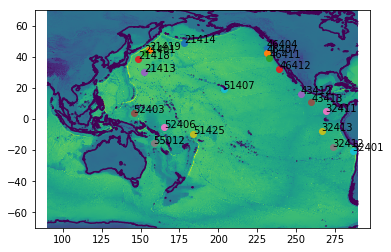

In [35]:
plt.pcolormesh(x,y,z)
plt.contour(x,y,z,[0.0])
for k in coordinates.keys():
#     if coordinates[k][0]>0:
        plt.scatter(coordinates[k][0] % 360,coordinates[k][1])
        plt.text(coordinates[k][0] % 360,coordinates[k][1],'{}'.format(k),color='k')
plt.axis('equal')